In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd drive/My\ Drive/DSF/Project/

/content/drive/My Drive/DSF/Project


In [5]:
ls

 costello_ace_2015-2016.csv   File.txt
 costello_ace_2017-2018.csv  "Retail Data Analysis - Data CSE519 Fall'19"/


In [6]:
df = pd.read_csv("costello_ace_2015-2016.csv", thousands=',', usecols=['Date','Item Description','Store Name','Net Sales Units','Gross Margin'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df1 = pd.read_csv("costello_ace_2017-2018.csv", thousands=',', usecols=['Date','Item Description','Store Name','Net Sales Units','Gross Margin'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df = df.append(df1)

In [9]:
df.head()

,Date,Store Name,Item Description,Net Sales Units,Gross Margin
0,4/1/2015,15784 EI PAINT,REG SEL INT MATTE BS1 GL,3,37.68
1,4/1/2015,15784 EI PAINT,REG SEL INT MATTE BS2 GL,2,28.46
2,4/1/2015,12168 WEST ISLIP,BLADE CUTOFF 4.5X1/16MTL,4,8.48
3,4/1/2015,12168 WEST ISLIP,CUT WHL4-1/2X.045 MTL,8,17.56
4,4/1/2015,12168 WEST ISLIP,GLOVE LTHR PALM WRK 3PK,1,9.53


In [10]:
df.Date.unique()

array(['4/1/2015', '4/2/2015', '4/3/2015', ..., '9/28/2018', '9/29/2018',
       '9/30/2018'], dtype=object)

In [11]:
df['Date'].isnull().sum()

0

In [0]:
df = df[df['Date']!='Date']
df = df[df['Date']!='\x1a']

In [0]:
df['Convt_Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [14]:
df.head()

,Date,Store Name,Item Description,Net Sales Units,Gross Margin,Convt_Date
0,4/1/2015,15784 EI PAINT,REG SEL INT MATTE BS1 GL,3,37.68,2015-04-01
1,4/1/2015,15784 EI PAINT,REG SEL INT MATTE BS2 GL,2,28.46,2015-04-01
2,4/1/2015,12168 WEST ISLIP,BLADE CUTOFF 4.5X1/16MTL,4,8.48,2015-04-01
3,4/1/2015,12168 WEST ISLIP,CUT WHL4-1/2X.045 MTL,8,17.56,2015-04-01
4,4/1/2015,12168 WEST ISLIP,GLOVE LTHR PALM WRK 3PK,1,9.53,2015-04-01


In [0]:
df = df.loc[df['Convt_Date'] < pd.to_datetime('September 1, 2018')]

In [0]:
df = df.loc[df['Convt_Date'] > pd.to_datetime('September 1, 2017')]

In [17]:
df.head()

,Date,Store Name,Item Description,Net Sales Units,Gross Margin,Convt_Date
887153,4/1/2018,14252 ISLAND PARK,POWER WASHER ELEC1600PSI,1,8.91,2018-04-01
887154,4/1/2018,15863 COPIAGUE,"PANSY 6"" POT",5,17.72,2018-04-01
887155,4/1/2018,6910 FARMINGDALE,9.5BR /LED/3000K/800L/12,1,5.34,2018-04-01
887156,4/1/2018,15863 COPIAGUE,STATUARY-PRAYING ANGEL,1,11.74,2018-04-01
887157,4/1/2018,15863 COPIAGUE,"7.75"" PANSY",1,5.99,2018-04-01


In [0]:
margin_df = df[['Convt_Date', 'Store Name', 'Item Description', 'Gross Margin']]

In [19]:
margin_df['Gross Margin'] = pd.to_numeric(margin_df['Gross Margin'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
margindf = margin_df.groupby('Store Name')['Gross Margin'].sum().sort_values(ascending=False).head(5)

In [0]:
margindf = margindf.append(margin_df.groupby('Store Name')['Gross Margin'].sum().sort_values(ascending=False).tail(5))

In [0]:
margindf = margindf.to_frame().reset_index()

In [53]:
margindf

,Store Name,Gross Margin
0,14252 ISLAND PARK,3.975998e+06
1,11116 BELLMORE,3.097555e+06
2,16663 EDGEWATER,2.232298e+06
3,16661 PASADENA,1.979784e+06
4,14664 NORTH MASSAPEQUA,1.766832e+06
5,16791 STATEN ISLAND,5.229750e+05
6,16660 GLEN BURNIE,5.205781e+05
7,7504 GRAND BLVD,3.242270e+05
8,5144 DEER PARK AVE,3.192995e+05
9,13168 BOHEMIA WAREHOUSE,-1.136868e-13


Text(0.5, 1.0, 'Store-wise Gross Margin for period Sept 1, 2017 to Sept 1, 2018')

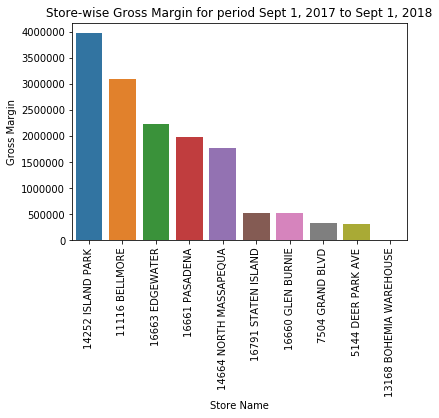

In [55]:
g = sns.barplot(x=margindf['Store Name'], y=margindf['Gross Margin'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Store-wise Gross Margin for period Sept 1, 2017 to Sept 1, 2018')

In [0]:
sales_df = df[['Convt_Date', 'Store Name', 'Item Description', 'Net Sales Units']]

In [0]:
sales_df['Net Sales Units'] = pd.to_numeric(sales_df['Net Sales Units'], errors='coerce')

In [0]:
# this part is still in progress:
keep = sales_df.groupby(['Store Name','Item Description'])['Net Sales Units'].sum().head(2).index
sales_df.loc[keep]

In [85]:
salesdf.head(50)

Store Name      Item Description                
11116 BELLMORE  "12"" Silicone-Tip Tongs"             2.0
                "16"" Silicone-Tip Tongs"             5.0
                "24""A/C ANIM SANTA W/AC ADAPTR"      3.0
                "3.9X9.8""CLEAR GLASS HURRICANE"      1.0
                "7.1""HOLIDAY LIGHT LANTERN"         22.0
                "Ash Tool for S, MX or MN EGGs"       5.0
                "Flat Pizza & Baking Stone 14"""     14.0
                "Flat Pizza & Baking Stone 21"""      3.0
                "Folding Grill Extender XL, L"        2.0
                "HAT" FEDORA                          4.0
                "HAT" FEDORA ASST                     1.0
                "HAT" OUTBACK MD                      2.0
                "HAT" OUTBACK SM                      2.0
                "HAT" RAFFIA (ARD ASST)               3.0
                "HAT" RESORT DESIGN                   1.0
                "HAT" SURVIVOR                        2.0
                "HAT" V

In [0]:
salesdf = salesdf.to_frame().reset_index()

In [80]:
salesdf.head(20)

,Store Name,Item Description,Net Sales Units
0,11116 BELLMORE,"""12"""" Silicone-Tip Tongs""",2.0
1,11116 BELLMORE,"""16"""" Silicone-Tip Tongs""",5.0
2,11116 BELLMORE,"""24""""A/C ANIM SANTA W/AC ADAPTR""",3.0
3,11116 BELLMORE,"""3.9X9.8""""CLEAR GLASS HURRICANE""",1.0
4,11116 BELLMORE,"""7.1""""HOLIDAY LIGHT LANTERN""",22.0
5,11116 BELLMORE,"""Ash Tool for S, MX or MN EGGs""",5.0
6,11116 BELLMORE,"""Flat Pizza & Baking Stone 14""""""",14.0
7,11116 BELLMORE,"""Flat Pizza & Baking Stone 21""""""",3.0
8,11116 BELLMORE,"""Folding Grill Extender XL, L""",2.0
9,11116 BELLMORE,"""HAT"" FEDORA",4.0
